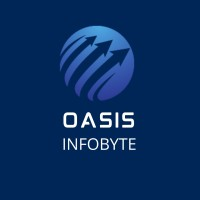

# Data Science Internship
# -Anisha Walde
# Task-3: Car Price Prediction with Machine Learning

**Objective:**
Develop a machine learning model to predict car prices based on various factors including brand reputation, car features, horsepower, and mileage, contributing to the research and application of car price prediction in the field of machine learning.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

C:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the Dataset
data1 = pd.read_csv('car data.csv')

In [3]:
data1.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data1.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
data1.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
data1.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [8]:
data1.shape

(301, 9)

In [9]:
data1.size

2709

In [10]:
data1.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Data Preprocessing

In [12]:
# Drop the 'Car_Name' column as it may not be relevant for prediction
data1 = data1.drop('Car_Name', axis=1)

In [13]:
# Encode categorical variables using one-hot encoding
data1 = pd.get_dummies(data1, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [14]:
# Split the data into features (X) and target (y)
X = data1.drop('Selling_Price', axis=1)
y = data1['Selling_Price']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

,Year,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
184,2008,0.750,26000,1,0,1,1,1
132,2017,0.950,3500,0,0,1,1,1
194,2008,0.787,50000,0,0,1,1,1
75,2015,6.800,36000,0,0,1,0,1
111,2016,1.500,8700,0,0,1,1,1
...,...,...,...,...,...,...,...,...
188,2013,0.570,18000,0,0,1,1,1
71,2011,12.480,45000,0,1,0,0,1
106,2014,3.450,16500,1,0,1,1,1
270,2011,10.000,69341,0,0,1,0,1


In [17]:
X_test

,Year,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
177,2016,0.57,24000,0,0,1,1,0
289,2016,13.60,10980,0,0,1,0,1
228,2012,9.40,60000,0,1,0,0,1
198,2011,0.57,35000,1,0,1,1,1
60,2013,18.61,40001,0,0,1,0,1
...,...,...,...,...,...,...,...,...
234,2015,5.70,4492,0,0,1,0,1
296,2016,11.60,33988,0,1,0,0,1
281,2006,7.60,50456,0,0,1,0,1
285,2016,8.50,15059,0,0,1,0,0


In [18]:
y_train.shape

(240,)

In [19]:
y_test.shape

(61,)

# Train a Machine Learning Model (Random Forest Regressor)

In [20]:
# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Cross-validation to evaluate the model
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

Cross-Validation RMSE Scores: [1.16403886 2.45810255 1.62362136 1.890074   1.08220921]
Mean RMSE: 1.6436091953844802


In [22]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the Model

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.83
Mean Absolute Error: 0.61
R-squared: 0.96


# Data Visualization 

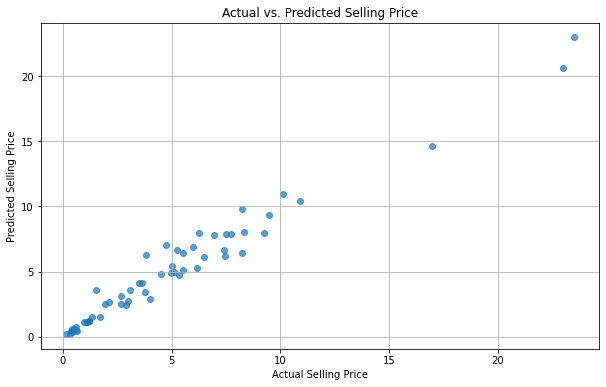

In [24]:
# Actual vs. Predicted Selling Price Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price")
plt.grid()
plt.show()

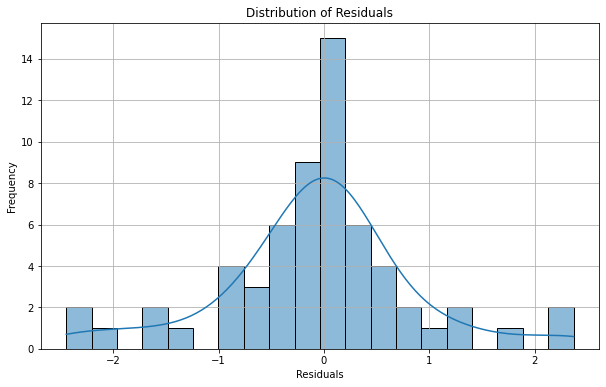

In [25]:
# Distribution of Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [26]:
# Feature Importance Analysis
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X.columns[i] for i in sorted_indices]

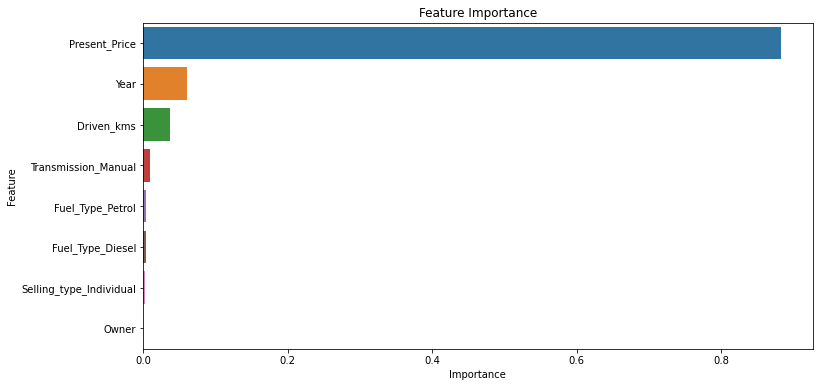

In [27]:
# Feature Importance Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances[sorted_indices], y=sorted_features, orient='h')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

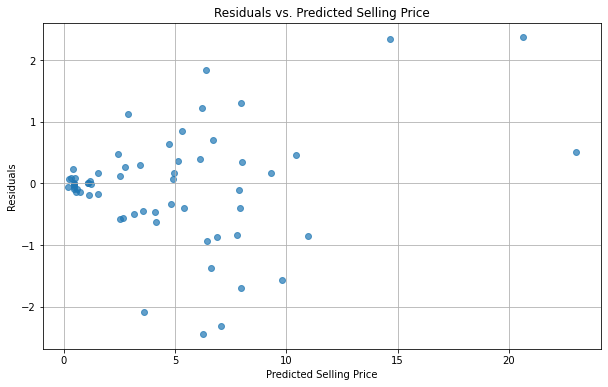

In [28]:
# Residuals vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.xlabel("Predicted Selling Price")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Selling Price")
plt.grid()
plt.show()

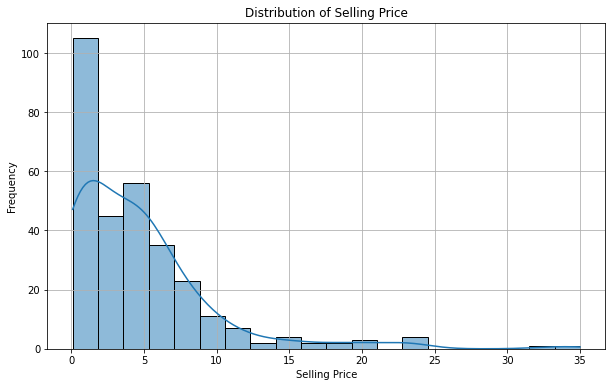

In [29]:
# Distribution of Target Variable (Selling Price)
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=20, kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.grid()
plt.show()

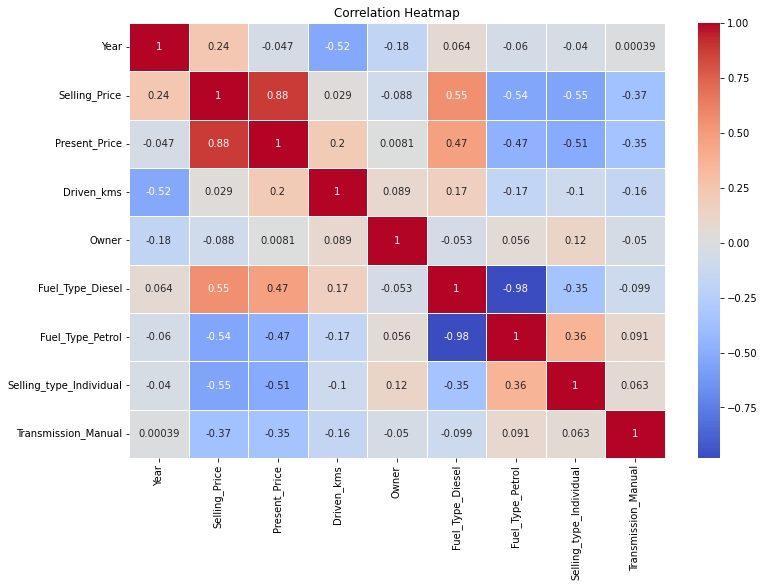

In [30]:
# Correlation Heatmap
corr_matrix = data1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

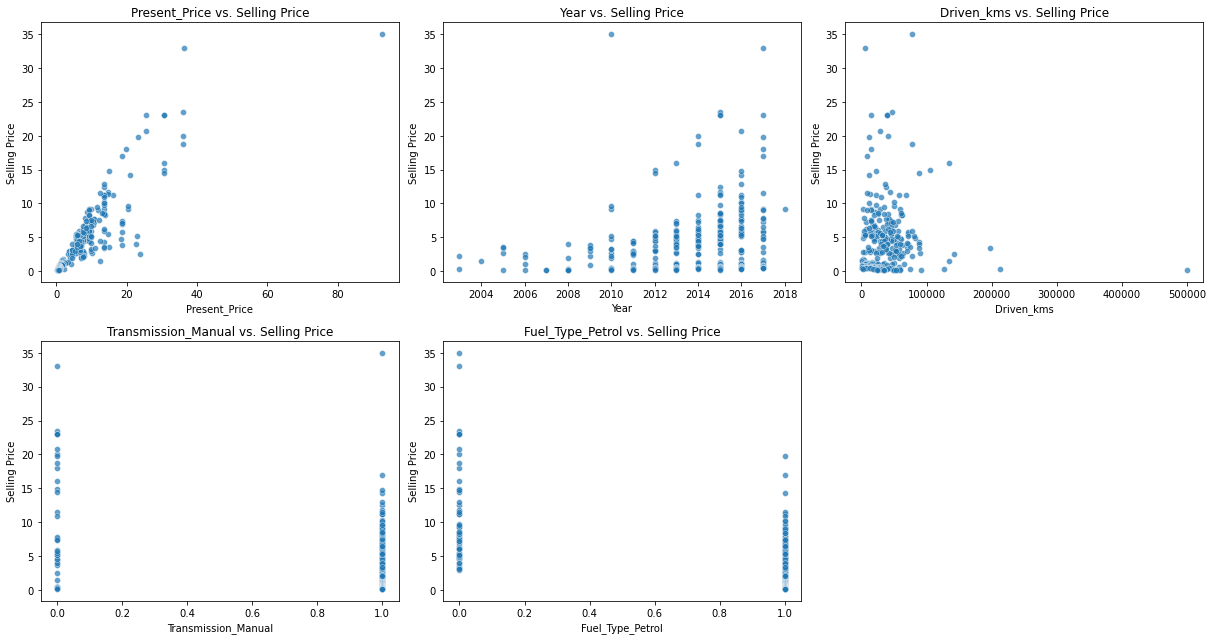

In [31]:
# Feature vs. Selling Price Plots (for the top features)
top_features = sorted_features[:5]  # Adjust the number of features to display as needed
plt.figure(figsize=(17, 9))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data1[feature], y=data1['Selling_Price'], alpha=0.7)
    plt.title(f'{feature} vs. Selling Price')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

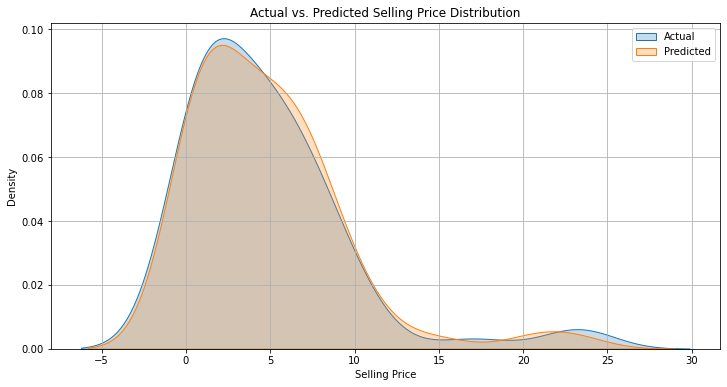

In [32]:
# Actual vs. Predicted Price Distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(y_test, label="Actual", shade=True)
sns.kdeplot(y_pred, label="Predicted", shade=True)
plt.title("Actual vs. Predicted Selling Price Distribution")
plt.xlabel("Selling Price")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

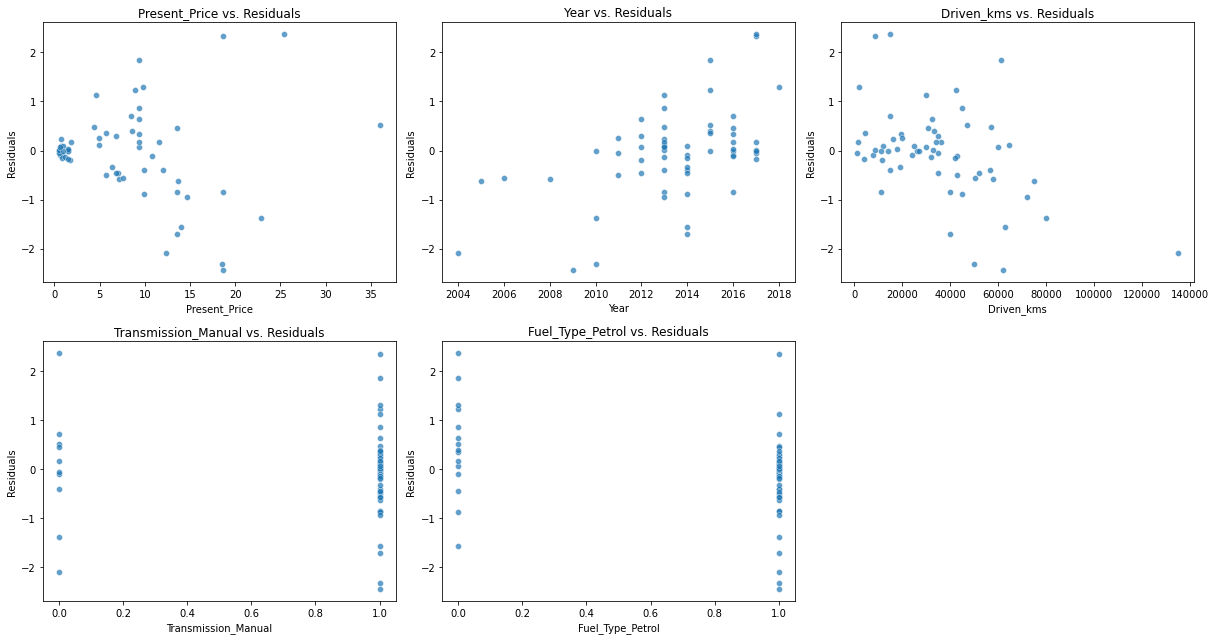

In [33]:
# Residuals vs. Features (for top features)
plt.figure(figsize=(17, 9))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=X_test[feature], y=residuals, alpha=0.7)
    plt.title(f'{feature} vs. Residuals')
    plt.xlabel(feature)
    plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

**Thank You!**